In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ThisDir = "C3d_ThreePointIntSync" #CHANGE THIS BY HAND!!!

SolDir  = "{}_sol".format(ThisDir)

OrdParamDir  = "{}_r".format(ThisDir)

PlotDir  = "{}_Plots".format(ThisDir)
# if not os.path.exists(PlotDir): os.makedirs(PlotDir)

In [3]:
N = 1000
NodeList = ['{}'.format(_) for _ in range(1, N+1)]

In [4]:
#----------------------------------------
# Time:
t_start = 0
t_stop = 500
dt = 0.01

t_List = np.arange(t_start, t_stop, dt)

N_t = len(t_List)
#----------------------------------------
# Length of end part of order parameter TS on which time avg will be calculated:
N_r = int((2./5)*N_t)
print("N_t = {}".format(N_t))
print("N_r = {}".format(N_r))
print("#----------------------------------------")
# print("\n")

N_t = 50000
N_r = 20000
#----------------------------------------


In [5]:
K1_List = np.linspace(-2.0, 2.0, 21)
K2_List = np.linspace(0.0, 2.0, 21)

In [6]:
ic_omega = 0
ic_theta = 0

In [7]:
kk2 = 0
K2 = K2_List[kk2]

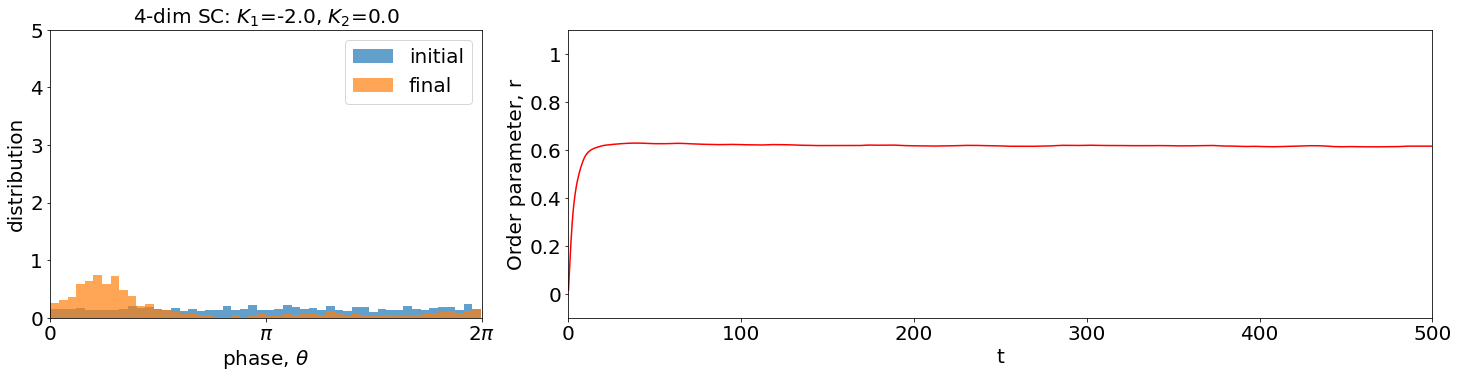

CPU times: user 1.78 s, sys: 339 ms, total: 2.12 s
Wall time: 2.01 s


In [8]:
%%time
#----------------------------------------
kk1 = 0
K1 = K1_List[kk1]
#----------------------------------------
sol_FileName_npy = f"{SolDir}/{ThisDir}_sol_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}.npy"
sol = np.load(sol_FileName_npy)

sol_dict = {}
for osc_index, node in enumerate(NodeList):
    sol_dict["osc"+node] = sol[:,osc_index]
sol_df =  pd.DataFrame.from_dict(sol_dict, dtype=np.float64)
#----------------------------------------
# Calculate order parameter:
x_pos_df = np.cos(sol_df)
y_pos_df = np.sin(sol_df)
#---
r_x_df = x_pos_df.sum(axis=1)/N
r_y_df = y_pos_df.sum(axis=1)/N

r_df = np.sqrt(r_x_df**2 + r_y_df**2)
#----------------------------------------
r_ForCalc = r_df.values[-N_r:]

r_TimeAvg = np.mean(r_ForCalc)
r_std = np.std(r_ForCalc, ddof=1)
r_std_error = r_std/np.sqrt(N_r)
r_MaxMin = max(r_ForCalc) - min(r_ForCalc)
#----------------------------------------
#----------------------------------------
# Plot OP vs time:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 2, 1])

ax2.plot(t_List, r_df.values, "r-")

ax2.set(xlim=(t_start, t_stop), ylim=(-0.1, 1.1))
# ax2.grid(True)

ax2.set_xticks([0, 100, 200, 300, 400, 500])
ax2.set_xticklabels([0, 100, 200, 300, 400, 500], fontsize=20)

ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=20)

ax2.set_xlabel("t", fontsize=20)
ax2.set_ylabel("Order parameter, r", fontsize=20)
# ax2.set_title(rf"$K_1$={K1}, $K_2$={K2}", fontsize=15)

# plt.show()
#----------------------------------------
# Plot initial and final phase distribution:
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])
#-----
tt = 0
phase_List_initial = sol_df.iloc[tt].values
ax1.hist(phase_List_initial, bins=50, density=True, color="C0", alpha=0.7, label="initial")
#-----
tt = 49999
phase_List_final = sol_df.iloc[tt].values
ax1.hist(phase_List_final, bins=50, density=True, color="C1", alpha=0.7, label="final")
#-----
ax1.set_xlabel(r"phase, $\theta$", fontsize=20)
ax1.set_ylabel("distribution", fontsize=20)
ax1.set_title(rf"4-dim SC: $K_1$={K1}, $K_2$={K2}", fontsize=20)

ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(["0", r"$\pi$", r"2$\pi$"], fontsize=20)

ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels([0, 1, 2, 3, 4, 5], fontsize=20)

ax1.set_xlim([0, 2*np.pi])
ax1.set_ylim([0, 5])
# ax1.grid(True)
ax1.legend(fontsize=20)
#-----
FigFormat = "png"
FigName = f"{PlotDir}/{ThisDir}_PhaseDistr_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}_ForResponse.{FigFormat}"
plt.savefig(FigName, format=FigFormat, transparent=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

---

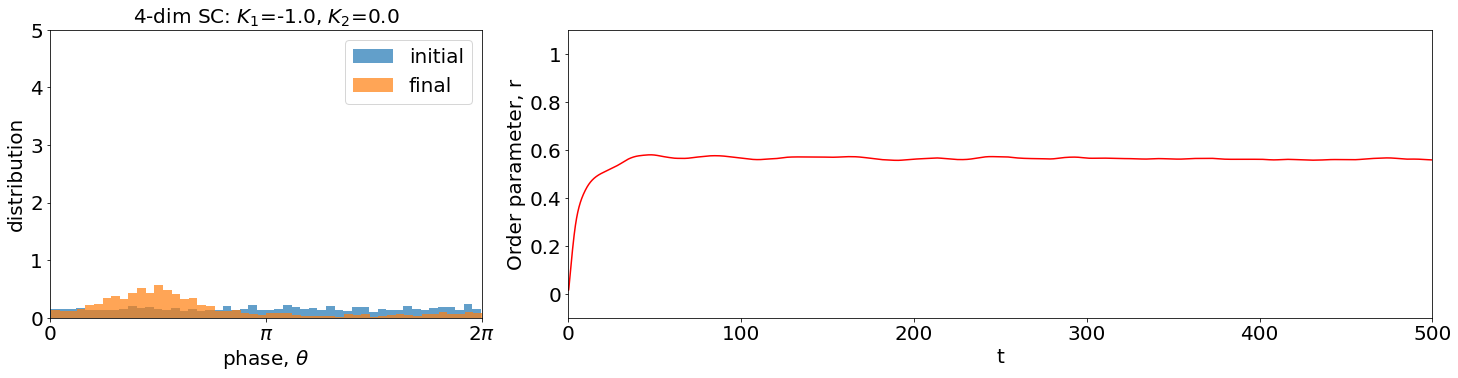

CPU times: user 1.64 s, sys: 263 ms, total: 1.91 s
Wall time: 1.9 s


In [9]:
%%time
#----------------------------------------
kk1 = 5
K1 = K1_List[kk1]
#----------------------------------------
sol_FileName_npy = f"{SolDir}/{ThisDir}_sol_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}.npy"
sol = np.load(sol_FileName_npy)

sol_dict = {}
for osc_index, node in enumerate(NodeList):
    sol_dict["osc"+node] = sol[:,osc_index]
sol_df =  pd.DataFrame.from_dict(sol_dict, dtype=np.float64)
#----------------------------------------
# Calculate order parameter:
x_pos_df = np.cos(sol_df)
y_pos_df = np.sin(sol_df)
#---
r_x_df = x_pos_df.sum(axis=1)/N
r_y_df = y_pos_df.sum(axis=1)/N

r_df = np.sqrt(r_x_df**2 + r_y_df**2)
#----------------------------------------
r_ForCalc = r_df.values[-N_r:]

r_TimeAvg = np.mean(r_ForCalc)
r_std = np.std(r_ForCalc, ddof=1)
r_std_error = r_std/np.sqrt(N_r)
r_MaxMin = max(r_ForCalc) - min(r_ForCalc)
#----------------------------------------
#----------------------------------------
# Plot OP vs time:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 2, 1])

ax2.plot(t_List, r_df.values, "r-")

ax2.set(xlim=(t_start, t_stop), ylim=(-0.1, 1.1))
# ax2.grid(True)

ax2.set_xticks([0, 100, 200, 300, 400, 500])
ax2.set_xticklabels([0, 100, 200, 300, 400, 500], fontsize=20)

ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=20)

ax2.set_xlabel("t", fontsize=20)
ax2.set_ylabel("Order parameter, r", fontsize=20)
# ax2.set_title(rf"$K_1$={K1}, $K_2$={K2}", fontsize=15)

# plt.show()
#----------------------------------------
# Plot initial and final phase distribution:
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])
#-----
tt = 0
phase_List_initial = sol_df.iloc[tt].values
ax1.hist(phase_List_initial, bins=50, density=True, color="C0", alpha=0.7, label="initial")
#-----
tt = 49999
phase_List_final = sol_df.iloc[tt].values
ax1.hist(phase_List_final, bins=50, density=True, color="C1", alpha=0.7, label="final")
#-----
ax1.set_xlabel(r"phase, $\theta$", fontsize=20)
ax1.set_ylabel("distribution", fontsize=20)
ax1.set_title(rf"4-dim SC: $K_1$={K1}, $K_2$={K2}", fontsize=20)

ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(["0", r"$\pi$", r"2$\pi$"], fontsize=20)

ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels([0, 1, 2, 3, 4, 5], fontsize=20)

ax1.set_xlim([0, 2*np.pi])
ax1.set_ylim([0, 5])
# ax1.grid(True)
ax1.legend(fontsize=20)
#-----
FigFormat = "png"
FigName = f"{PlotDir}/{ThisDir}_PhaseDistr_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}_ForResponse.{FigFormat}"
plt.savefig(FigName, format=FigFormat, transparent=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

---

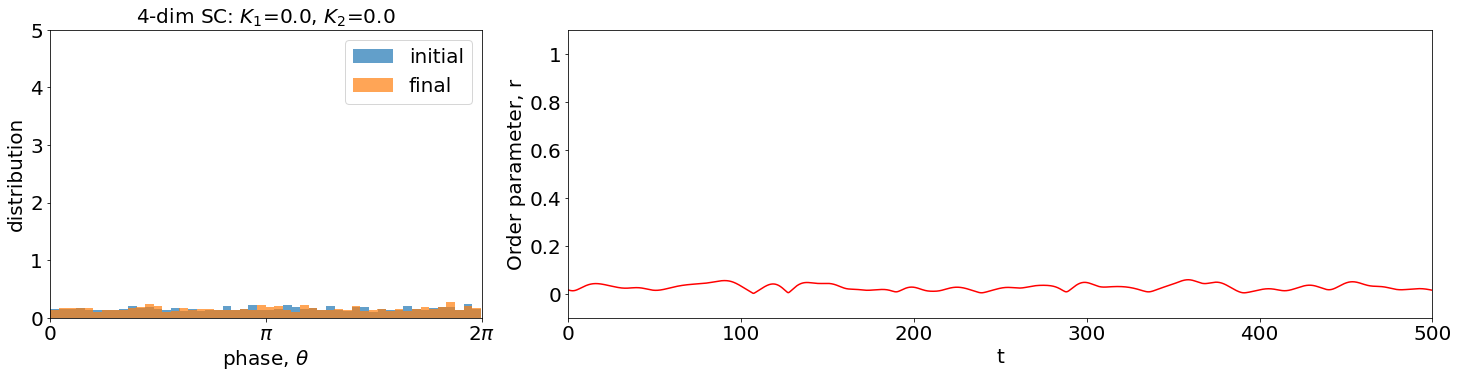

CPU times: user 1.67 s, sys: 228 ms, total: 1.9 s
Wall time: 1.9 s


In [10]:
%%time
#----------------------------------------
kk1 = 10
K1 = K1_List[kk1]
#----------------------------------------
sol_FileName_npy = f"{SolDir}/{ThisDir}_sol_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}.npy"
sol = np.load(sol_FileName_npy)

sol_dict = {}
for osc_index, node in enumerate(NodeList):
    sol_dict["osc"+node] = sol[:,osc_index]
sol_df =  pd.DataFrame.from_dict(sol_dict, dtype=np.float64)
#----------------------------------------
# Calculate order parameter:
x_pos_df = np.cos(sol_df)
y_pos_df = np.sin(sol_df)
#---
r_x_df = x_pos_df.sum(axis=1)/N
r_y_df = y_pos_df.sum(axis=1)/N

r_df = np.sqrt(r_x_df**2 + r_y_df**2)
#----------------------------------------
r_ForCalc = r_df.values[-N_r:]

r_TimeAvg = np.mean(r_ForCalc)
r_std = np.std(r_ForCalc, ddof=1)
r_std_error = r_std/np.sqrt(N_r)
r_MaxMin = max(r_ForCalc) - min(r_ForCalc)
#----------------------------------------
#----------------------------------------
# Plot OP vs time:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 2, 1])

ax2.plot(t_List, r_df.values, "r-")

ax2.set(xlim=(t_start, t_stop), ylim=(-0.1, 1.1))
# ax2.grid(True)

ax2.set_xticks([0, 100, 200, 300, 400, 500])
ax2.set_xticklabels([0, 100, 200, 300, 400, 500], fontsize=20)

ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=20)

ax2.set_xlabel("t", fontsize=20)
ax2.set_ylabel("Order parameter, r", fontsize=20)
# ax2.set_title(rf"$K_1$={K1}, $K_2$={K2}", fontsize=15)

# plt.show()
#----------------------------------------
# Plot initial and final phase distribution:
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])
#-----
tt = 0
phase_List_initial = sol_df.iloc[tt].values
ax1.hist(phase_List_initial, bins=50, density=True, color="C0", alpha=0.7, label="initial")
#-----
tt = 49999
phase_List_final = sol_df.iloc[tt].values
ax1.hist(phase_List_final, bins=50, density=True, color="C1", alpha=0.7, label="final")
#-----
ax1.set_xlabel(r"phase, $\theta$", fontsize=20)
ax1.set_ylabel("distribution", fontsize=20)
ax1.set_title(rf"4-dim SC: $K_1$={K1}, $K_2$={K2}", fontsize=20)

ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(["0", r"$\pi$", r"2$\pi$"], fontsize=20)

ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels([0, 1, 2, 3, 4, 5], fontsize=20)

ax1.set_xlim([0, 2*np.pi])
ax1.set_ylim([0, 5])
# ax1.grid(True)
ax1.legend(fontsize=20)
#-----
FigFormat = "png"
FigName = f"{PlotDir}/{ThisDir}_PhaseDistr_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}_ForResponse.{FigFormat}"
plt.savefig(FigName, format=FigFormat, transparent=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

---

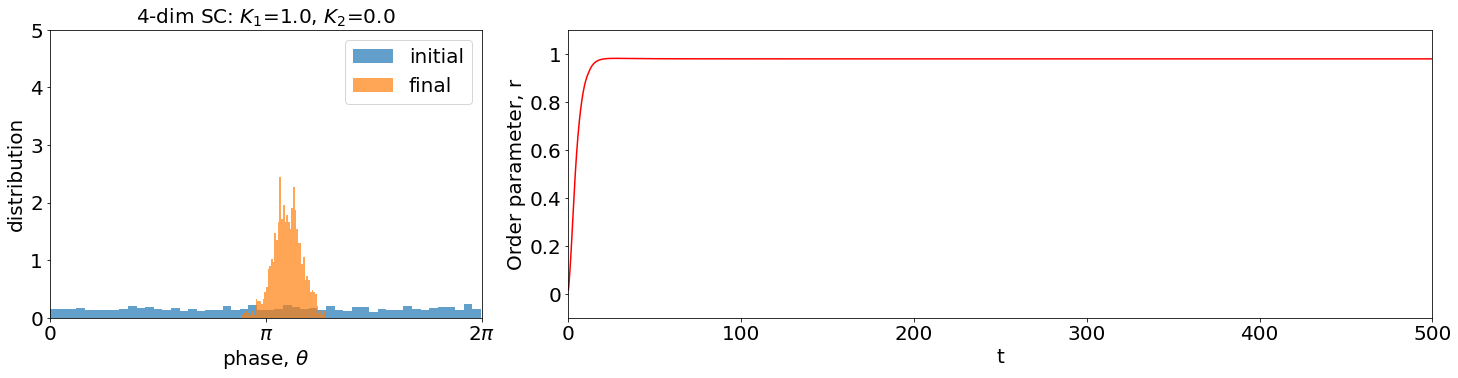

CPU times: user 1.72 s, sys: 224 ms, total: 1.95 s
Wall time: 1.94 s


In [11]:
%%time
#----------------------------------------
kk1 = 15
K1 = K1_List[kk1]
#----------------------------------------
sol_FileName_npy = f"{SolDir}/{ThisDir}_sol_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}.npy"
sol = np.load(sol_FileName_npy)

sol_dict = {}
for osc_index, node in enumerate(NodeList):
    sol_dict["osc"+node] = sol[:,osc_index]
sol_df =  pd.DataFrame.from_dict(sol_dict, dtype=np.float64)
#----------------------------------------
# Calculate order parameter:
x_pos_df = np.cos(sol_df)
y_pos_df = np.sin(sol_df)
#---
r_x_df = x_pos_df.sum(axis=1)/N
r_y_df = y_pos_df.sum(axis=1)/N

r_df = np.sqrt(r_x_df**2 + r_y_df**2)
#----------------------------------------
r_ForCalc = r_df.values[-N_r:]

r_TimeAvg = np.mean(r_ForCalc)
r_std = np.std(r_ForCalc, ddof=1)
r_std_error = r_std/np.sqrt(N_r)
r_MaxMin = max(r_ForCalc) - min(r_ForCalc)
#----------------------------------------
#----------------------------------------
# Plot OP vs time:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 2, 1])

ax2.plot(t_List, r_df.values, "r-")

ax2.set(xlim=(t_start, t_stop), ylim=(-0.1, 1.1))
# ax2.grid(True)

ax2.set_xticks([0, 100, 200, 300, 400, 500])
ax2.set_xticklabels([0, 100, 200, 300, 400, 500], fontsize=20)

ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=20)

ax2.set_xlabel("t", fontsize=20)
ax2.set_ylabel("Order parameter, r", fontsize=20)
# ax2.set_title(rf"$K_1$={K1}, $K_2$={K2}", fontsize=15)

# plt.show()
#----------------------------------------
# Plot initial and final phase distribution:
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])
#-----
tt = 0
phase_List_initial = sol_df.iloc[tt].values
ax1.hist(phase_List_initial, bins=50, density=True, color="C0", alpha=0.7, label="initial")
#-----
tt = 49999
phase_List_final = sol_df.iloc[tt].values
ax1.hist(phase_List_final, bins=50, density=True, color="C1", alpha=0.7, label="final")
#-----
ax1.set_xlabel(r"phase, $\theta$", fontsize=20)
ax1.set_ylabel("distribution", fontsize=20)
ax1.set_title(rf"4-dim SC: $K_1$={K1}, $K_2$={K2}", fontsize=20)

ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(["0", r"$\pi$", r"2$\pi$"], fontsize=20)

ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels([0, 1, 2, 3, 4, 5], fontsize=20)

ax1.set_xlim([0, 2*np.pi])
ax1.set_ylim([0, 5])
# ax1.grid(True)
ax1.legend(fontsize=20)
#-----
FigFormat = "png"
FigName = f"{PlotDir}/{ThisDir}_PhaseDistr_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}_ForResponse.{FigFormat}"
plt.savefig(FigName, format=FigFormat, transparent=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

---

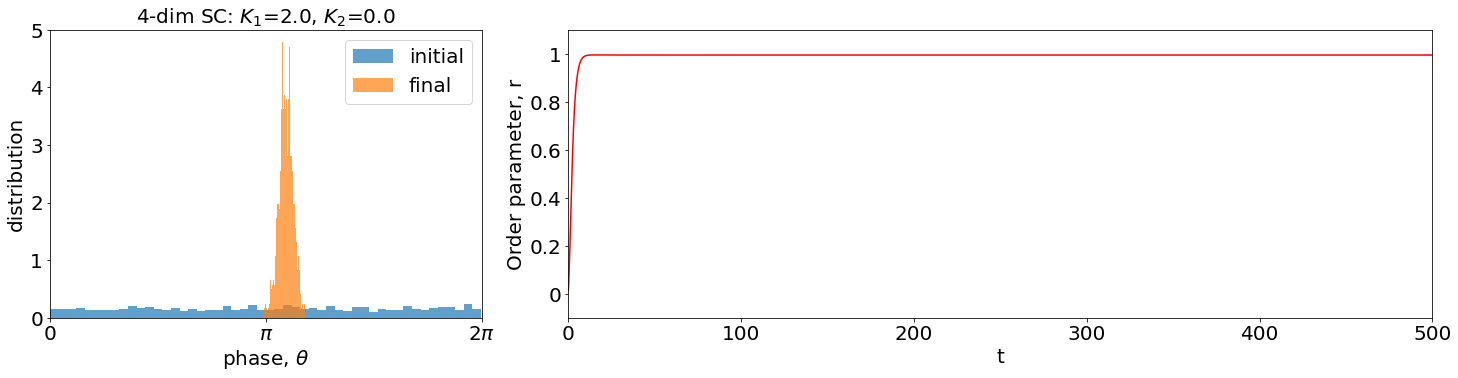

CPU times: user 1.68 s, sys: 263 ms, total: 1.95 s
Wall time: 1.94 s


In [12]:
%%time
#----------------------------------------
kk1 = 20
K1 = K1_List[kk1]
#----------------------------------------
sol_FileName_npy = f"{SolDir}/{ThisDir}_sol_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}.npy"
sol = np.load(sol_FileName_npy)

sol_dict = {}
for osc_index, node in enumerate(NodeList):
    sol_dict["osc"+node] = sol[:,osc_index]
sol_df =  pd.DataFrame.from_dict(sol_dict, dtype=np.float64)
#----------------------------------------
# Calculate order parameter:
x_pos_df = np.cos(sol_df)
y_pos_df = np.sin(sol_df)
#---
r_x_df = x_pos_df.sum(axis=1)/N
r_y_df = y_pos_df.sum(axis=1)/N

r_df = np.sqrt(r_x_df**2 + r_y_df**2)
#----------------------------------------
r_ForCalc = r_df.values[-N_r:]

r_TimeAvg = np.mean(r_ForCalc)
r_std = np.std(r_ForCalc, ddof=1)
r_std_error = r_std/np.sqrt(N_r)
r_MaxMin = max(r_ForCalc) - min(r_ForCalc)
#----------------------------------------
#----------------------------------------
# Plot OP vs time:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 2, 1])

ax2.plot(t_List, r_df.values, "r-")

ax2.set(xlim=(t_start, t_stop), ylim=(-0.1, 1.1))
# ax2.grid(True)

ax2.set_xticks([0, 100, 200, 300, 400, 500])
ax2.set_xticklabels([0, 100, 200, 300, 400, 500], fontsize=20)

ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=20)

ax2.set_xlabel("t", fontsize=20)
ax2.set_ylabel("Order parameter, r", fontsize=20)
# ax2.set_title(rf"$K_1$={K1}, $K_2$={K2}", fontsize=15)

# plt.show()
#----------------------------------------
# Plot initial and final phase distribution:
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])
#-----
tt = 0
phase_List_initial = sol_df.iloc[tt].values
ax1.hist(phase_List_initial, bins=50, density=True, color="C0", alpha=0.7, label="initial")
#-----
tt = 49999
phase_List_final = sol_df.iloc[tt].values
ax1.hist(phase_List_final, bins=50, density=True, color="C1", alpha=0.7, label="final")
#-----
ax1.set_xlabel(r"phase, $\theta$", fontsize=20)
ax1.set_ylabel("distribution", fontsize=20)
ax1.set_title(rf"4-dim SC: $K_1$={K1}, $K_2$={K2}", fontsize=20)

ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.set_xticklabels(["0", r"$\pi$", r"2$\pi$"], fontsize=20)

ax1.set_yticks([0, 1, 2, 3, 4, 5])
ax1.set_yticklabels([0, 1, 2, 3, 4, 5], fontsize=20)

ax1.set_xlim([0, 2*np.pi])
ax1.set_ylim([0, 5])
# ax1.grid(True)
ax1.legend(fontsize=20)
#-----
FigFormat = "png"
FigName = f"{PlotDir}/{ThisDir}_PhaseDistr_omega{ic_omega}_theta{ic_theta}_K1_{kk1}_K2_{kk2}_ForResponse.{FigFormat}"
plt.savefig(FigName, format=FigFormat, transparent=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

---